## QUESTION 1

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 639.5, 624.5, -0.5),
 Text(0.5, 1.0, 'Edge Detection'))

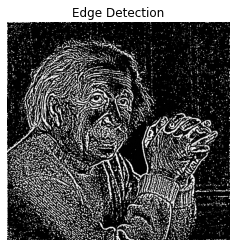

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('einstein.jpg')
blurred1 = cv2.GaussianBlur(img, (5, 5), 0)
blurred2 = cv2.GaussianBlur(img,(9,9),0)
output = blurred2-blurred1
plt.figure(),plt.imshow(output,cmap='gray'),plt.axis('off'),plt.title('Edge Detection')

## QUESTION 2

In [4]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
obj = cv.imread('Barallel.png')
hsv = cv.cvtColor(obj,cv.COLOR_BGR2HSV)
video=cv2.VideoCapture('vi.mp4')
success,target = video.read()
while(success):
 hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
# calculating object histogram
 objhist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
# normalize histogram and apply backprojection
 cv.normalize(objhist,objhist,0,255,cv.NORM_MINMAX)
 dst = cv.calcBackProject([hsvt],[0,1],objhist,[0,180,0,256],1)
 # Now convolute with circular disc
 disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
 cv.filter2D(dst,-1,disc,dst)
# threshold and binary AND
 ret,thresh = cv.threshold(dst,50,255,0)
 final = cv.merge((thresh,thresh,thresh))
 result = cv.bitwise_or(target,final)
 cv2_imshow(result)

error: ignored